# FINAL PROJECT. PART 1. TEXT PROCESSING

## Loading the libraries

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import time
import json
import re
import unidecode
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import multiprocessing
from gensim.models import Word2Vec
import codecs

## Transforming the .txt document into .json file

In [3]:
#Data with original text of the tweet
with open('dataset_tweets_WHO.txt') as f:
    json_data1 = json.load(f)

#Data with the preprocessed text of a tweet
with open('dataset_tweets_WHO.txt') as f:
    json_data = json.load(f)

#Data for evaluation
with open('dataset_tweets_WHO.txt') as f:
    json_data_evaluation = json.load(f)

In [4]:
json_data['0']

{'created_at': 'Wed Oct 13 09:15:58 +0000 2021',
 'id': 1448215930178310144,
 'id_str': '1448215930178310144',
 'full_text': "It's International Day for Disaster Risk Reduction\n\n#OpenWHO has launched a multi-tiered core curriculum to help equip you with the competencies needed to work within public health emergency response.\n\nStart learning today &amp; be #Ready4Response:\n👉 https://t.co/hBFFOF0xKL https://t.co/fgZY22RWuS",
 'truncated': False,
 'display_text_range': [0, 274],
 'entities': {'hashtags': [{'text': 'OpenWHO', 'indices': [52, 60]},
   {'text': 'Ready4Response', 'indices': [232, 247]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/hBFFOF0xKL',
    'expanded_url': 'https://bit.ly/3wCa0Dr',
    'display_url': 'bit.ly/3wCa0Dr',
    'indices': [251, 274]}],
  'media': [{'id': 1448215398814560259,
    'id_str': '1448215398814560259',
    'indices': [275, 298],
    'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1448215398814560259/pu/img/0CO

## Text Processing

In [5]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))
def cleanText(text):
    text = unidecode.unidecode(text)
    a = text.lower() #put everything in lowercase
    result = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",a) #cleaning data
    result = result.split() #tokenize
    result = [word for word in result if word not in stop_words ] #removing stop words
    result = [stemmer.stem(word) for word in result] #stemming (looking for the root)
    return result

## Comparison of the original text with the preprocessed one

In [6]:
#Original text
print(json_data['0']['full_text'])

It's International Day for Disaster Risk Reduction

#OpenWHO has launched a multi-tiered core curriculum to help equip you with the competencies needed to work within public health emergency response.

Start learning today &amp; be #Ready4Response:
👉 https://t.co/hBFFOF0xKL https://t.co/fgZY22RWuS


In [7]:
#Preprocessed text
print(cleanText(json_data['0']['full_text']))

['intern', 'day', 'disast', 'risk', 'reduct', 'openwho', 'launch', 'multi', 'tier', 'core', 'curriculum', 'help', 'equip', 'compet', 'need', 'work', 'within', 'public', 'health', 'emerg', 'respons', 'start', 'learn', 'today', 'amp', 'ready4respons']


## Putting the preprocessed text back into the dictionary

In [8]:
for i in json_data.keys():
    json_data[i]['full_text'] = cleanText(json_data[i]['full_text'])

# PART 2 Information Retrieval and Web Analytics: index and Evaluation

## Rank-Based Metrics


## 1. Create the inverted index

In [9]:
#Creating the list of preprocessed tweets
all_tweets = []
for i in json_data.keys():
     all_tweets.append(json_data[i]['full_text'])
print(all_tweets[0])    

['intern', 'day', 'disast', 'risk', 'reduct', 'openwho', 'launch', 'multi', 'tier', 'core', 'curriculum', 'help', 'equip', 'compet', 'need', 'work', 'within', 'public', 'health', 'emerg', 'respons', 'start', 'learn', 'today', 'amp', 'ready4respons']


In [10]:
def create_index(lines):
    """
    Implement the inverted index
    
    Argument:
    lines -- collection of tweets
    
    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in (and the positions) as values.
    """
    index = defaultdict(list)
    for i in range(len(lines)):  #lines contain all tweets
        page_id = json_data[str(i)]['id']
        terms = json_data[str(i)]['full_text']
       
        ## ===============================================================        
        ## create the index for the current page and store it in current_page_index (current_page_index)
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is 
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0, 
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms): # terms contains the tweet text. Loop over all terms
            try:
                # if the term is already in the index for the current page (current_page_index)
                # append the position to the corresponding list
                
                current_page_index[term][1].append(position)  
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[page_id, array('I',[position])] #'I' indicates unsigned int (int in Python)
            
        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)                   
                    
    return index

In [11]:
start_time = time.time()
index = create_index(all_tweets)
print("Total time to create the index: {} seconds".format(np.round(time.time() - start_time, 2)))

Total time to create the index: 0.07 seconds


In [12]:
#We applied stemming, that is why the results for researcher are not given
print("Index results for the term 'researcher': {}\n".format(index['researcher']))
print("First 10 Index results for the term 'research': \n{}".format(index['research'][:10]))

Index results for the term 'researcher': []

First 10 Index results for the term 'research': 
[[1447644123868114950, array('I', [17])], [1446446110411739141, array('I', [21])], [1446114492203429902, array('I', [16])], [1445848161130475520, array('I', [4])], [1445780830765211654, array('I', [6])], [1445780396151476243, array('I', [3])], [1445777658457980935, array('I', [5])], [1442501905935175683, array('I', [12])], [1442498895636955138, array('I', [4])], [1442466033131003908, array('I', [23])]]


In [13]:
def retrieve_docs(docs, top):
    
    """
    Retrieve the documents in the required format
    
    Argument:
    docs -- collection of tweets
    top -- the number of tweets to retrieve
    
    Returns:
    doc_info - the collection of top tweets retrieved in the required format
    """
    doc_info = []
    for d_id in docs[:top]:
        for j in json_data1.keys():
            if(d_id == json_data1[j]['id']):
                #Check if the tweet has hashtags
                if(len(json_data1[j]["entities"]["hashtags"])!= 0):
                    #Check if the tweet has a link (can lack it if the tweet is an answer to the main one)
                    if 'media' in json_data1[j]['entities'].keys():
                        doc_info.append([[json_data1[j]["full_text"]],[json_data1[j]["user"]['name']], [json_data1[j]["created_at"]],
                                 ['#'+ json_data1[j]["entities"]['hashtags'][:][i]['text'] for i in range(len(json_data1[j]["entities"]['hashtags']))], 
                                 [str(json_data1[j]["favorite_count"])],[str(json_data1[j]["retweet_count"])],[json_data1[j]["entities"]["media"][0]['url']]])
                    else:
                        doc_info.append([[json_data1[j]["full_text"]],[json_data1[j]["user"]['name']], [json_data1[j]["created_at"]],
                                 ['#'+ json_data1[j]["entities"]['hashtags'][:][i]['text'] for i in range(len(json_data1[j]["entities"]['hashtags']))], 
                                 [str(json_data1[j]["favorite_count"])],[str(json_data1[j]["retweet_count"])]])
                else:
                    if 'media' in json_data1[j]['entities'].keys():
                        doc_info.append([[json_data1[j]["full_text"]],[json_data1[j]["user"]['name']], [json_data1[j]["created_at"]],
                                [str(json_data1[j]["favorite_count"])],[str(json_data1[j]["retweet_count"])],[json_data1[j]["entities"]["media"][0]['url']]])
                    else:
                        doc_info.append([[json_data1[j]["full_text"]],[json_data1[j]["user"]['name']], [json_data1[j]["created_at"]],
                                [str(json_data1[j]["favorite_count"])],[str(json_data1[j]["retweet_count"])]])



    for j in range(len(doc_info)):
        for i in range(len(doc_info[j])):
            doc_info[j][i] = (' | ').join(doc_info[j][i])
        doc_info[j] = (' | ').join(doc_info[j])
    return doc_info


In [14]:
def search(query, index):
    """
    The output is the list of documents that contain all of the query terms. 
    So, we will get the list of documents for each query term, and take the intersection of them.
    """
    query = cleanText(query)
    docs = set([posting[0] for posting in index[query[0]]])
    for term in query[1:]:
        try:
            # store in term_docs the ids of the docs that contain "term"                        
            term_docs=[posting[0] for posting in index[term]]
            # docs = docs Intersection term_docs
            docs = docs.intersection(set(term_docs)) 
        except:
            #term is not in index
            pass
    docs = list(docs)
    return docs

In [15]:
#An example of an output with a query
print("Insert your query (i.e.: Computer Science):\n")
query = input()
docs = search(query, index)
if len(docs) < 10:
    top = len(docs)
else:
    top = 10

print("\n======================\nSample of {} results out of {} for the searched query:\n".format(top, len(docs)))
formated = retrieve_docs(docs, top)
count = 1
for doc in formated:
    print('Result', count, ':\n\n', doc + '\n')
    count += 1

Insert your query (i.e.: Computer Science):

women in health work

Sample of 6 results out of 6 for the searched query:

Result 1 :

 @DrTedros @WHOEMRO @WHOAfghanistan @UN_News_Centre @UNNewsArabic WHO is committed to:
1) working with partners to invest in the health education of girls &amp; women, &amp; continue training female health workers
2) support an extensive trauma programme that includes training, supplies and equipment for 130 hospitals and 67 blood banks
#StayAndDeliver https://t.co/4Iiz9TsFXX | World Health Organization (WHO) | Wed Sep 22 09:05:48 +0000 2021 | #StayAndDeliver | 142 | 33 | https://t.co/4Iiz9TsFXX

Result 2 :

 We must #ActForEqual to advance #GenderEquality in healthcare. Men continue to lead in global health while women continue to experience barriers like:

🔹 disproportionate burdens of unpaid care work, 
🔹 wage gaps
🔹 harassment 
🔹 less opportunities for career advancement. https://t.co/xPwj8VF50z | World Health Organization (WHO) | Thu Jul 01 06:43:11 

## 2. Make a proposal of 5 queries that will be used to evaluate your search engine (e.g., “covid pandemic”)


In [16]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


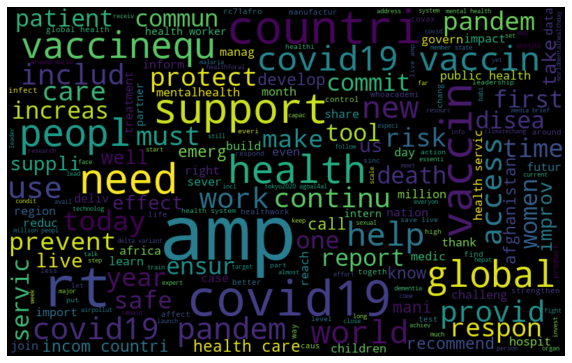

In [17]:
from wordcloud import WordCloud

#Identifying the most common words (after removing the stop ones) of the tweets

all_words = []
all_words = [item for sublist in all_tweets for item in sublist]
all_words = ' '.join(all_words)

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

In [18]:
word_counter = collections.Counter(all_words.split() )
w =word_counter.most_common(10)

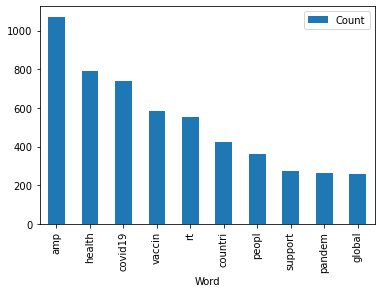

In [19]:
#Plotting the 10 most common words' frequency
df = pd.DataFrame(w, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')
plt.savefig('barplot.png')


### Our proposal of the 5 queries used to evaluate our search engine

1 - Vaccine for covid19

2 - Countries with more deaths from covid19

3 - Mental health support

4 - Women in health work

5 - Covid19 symptoms

## 3. Add Ranking with TF-IDF

In [20]:
def create_index_tfidf(lines, num_documents):
    """
    Implement the inverted index and compute tf, df and idf
    
    Argument:
    lines -- collection of Wikipedia articles
    num_documents -- total number of documents
    
    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    index = defaultdict(list)
    tf = defaultdict(list)  #term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  #document frequencies of terms in the corpus
    idf = defaultdict(float)

    for i in range(len(lines)):  # Remember, lines contain all tweets
        page_id = json_data[str(i)]['id']
        terms = json_data[str(i)]['full_text']

        ## ===============================================================        
        ## create the index for the **current page** and store it in current_page_index
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is 
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0, 
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms):  ## terms contains page_title + page_text
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[page_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document. 
            # posting ==> [current_doc, [list of positions]] 
            # you can use it to infer the frequency of current term.
            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)

        #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1])/norm,4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term]+=1 # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_documents/ df[term])), 4)

    return index, tf, df, idf


In [21]:
start_time = time.time()
num_documents = len(all_tweets)
index, tf, df, idf = create_index_tfidf(all_tweets, num_documents)
print("Total time to create the index: {} seconds" .format(np.round(time.time() - start_time, 2)))

Total time to create the index: 76.87 seconds


In [22]:
def rank_documents(terms, docs, index, idf, tf):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """

    # We are interested only on the element of the docVector corresponding to the query terms 
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # We call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query. 
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    #HINT: use when computing tf for query_vector

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex]=query_terms_count[term]/query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26            
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc 
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot
    
    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs

In [23]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = cleanText(query)
    docs = set([posting[0] for posting in index[query[0]]])
    for term in query[1:]:
        try:
            # store in term_docs the ids of the docs that contain "term"                        
            term_docs=[posting[0] for posting in index[term]]
            
            # docs = docs Union term_docs
            docs = docs.intersection(set(term_docs))
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs = rank_documents(query, docs, index, idf, tf)
    return ranked_docs

In [24]:
#Output of ranked documents related to the query
print("Insert your query (i.e.: Computer Science):\n")
query = input()
ranked_docs = search_tf_idf(query, index)
if len(docs) < 10:
    top = len(docs)
else:
    top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
#for d_id in ranked_docs[:top]:
    #print("page_id= {} ".format(d_id))
formated = retrieve_docs(ranked_docs, top)

count = 1
for doc in formated:
    print('Result', count, ':\n\n', doc + '\n')
    count += 1

Insert your query (i.e.: Computer Science):

women in health work

Top 6 results out of 6 for the searched query:

Result 1 :

 @DrTedros @UNICEF @UN @WFP "I thank the women and men of WHO’s national and international staff who continue to work every day to protect and promote the health of all #Afghanistan’s people"-@DrTedros | World Health Organization (WHO) | Mon Sep 13 15:23:06 +0000 2021 | #Afghanistan | 93 | 25

Result 2 :

 Women make up 7⃣0⃣ % of the health workforce but only 2⃣5⃣ % at decision-making level. 

At the #GenerationEquality Forum this week, WHO joins global leaders and activists in advancing decent and safe work conditions for health and care workers everywhere.
https://t.co/52NIwTDRdK https://t.co/zk4Dw4JC9A | World Health Organization (WHO) | Thu Jul 01 08:52:13 +0000 2021 | #GenerationEquality | 210 | 78 | https://t.co/zk4Dw4JC9A

Result 3 :

 @DrTedros @WHOEMRO @WHOAfghanistan @UN_News_Centre @UNNewsArabic WHO particularly emphasizes the need for women to maint

## Evaluation


## 1. Creating the ground truth for the documents related to the queries

In [25]:
df_ground_truth = pd.DataFrame(columns=['q_id', 'doc_id', 'y_true'])

#Creating the list of queries ids
query1 = 'Vaccine for covid19'
query2 = 'Countries with more deaths from covid19'
query3 = 'Mental health support'
query4 = 'Women in health work'
query5 = 'Covid19 symptoms'
queries = [1,2,3,4,5]

#Creating the list of the top 10 ranked documents for each query
ranked_docs1 = search_tf_idf(query1, index)[:10]
ranked_docs2 = search_tf_idf(query2, index)[:10]
ranked_docs3 = search_tf_idf(query3, index)[:10]
ranked_docs4 = search_tf_idf(query4, index)[:10]
ranked_docs5 = search_tf_idf(query5, index)[:10]
ranked_docs_all = [ranked_docs1, ranked_docs2, ranked_docs3, ranked_docs4, ranked_docs5]

#Creating the list of labels indicating the relevance of documents (0 - not relevant, 4 - very relevant)
y_true1 = [4,0,0,1,0,0,1,2,3,4]
y_true2 = [1,0,1,0,3,0,0,0,3,0]
y_true3 = [0,1,3,2]
y_true4 = [3,4,3,4,2,1]
y_true5 = [0,4,2,0,1,0,2]
y_true_all = [y_true1, y_true2, y_true3, y_true4, y_true5]

#Creating the list of ranked documents ideally ordered by relevance
y_true1_ideal = y_true1.copy()
y_true2_ideal = y_true2.copy()
y_true3_ideal = y_true3.copy()
y_true4_ideal = y_true4.copy()
y_true5_ideal = y_true5.copy()

y_true1_ideal.sort(reverse=True)
y_true2_ideal.sort(reverse=True)
y_true3_ideal.sort(reverse=True)
y_true4_ideal.sort(reverse=True)
y_true5_ideal.sort(reverse=True)
y_true_ideal_all = [y_true1_ideal, y_true2_ideal, y_true3_ideal, y_true4_ideal, y_true5_ideal]


for i in range(len(queries)):
    for row in range(len(ranked_docs_all[i])):
        newRow = {
            "q_id": queries[i],
            "doc_id": ranked_docs_all[i][row] ,
            "y_true": y_true_all[i][row],
            "y_true_ideal": y_true_ideal_all[i][row]
        }
        
        df_ground_truth = df_ground_truth.append(newRow, ignore_index=True, sort=False)

df_ground_truth 

,q_id,doc_id,y_true,y_true_ideal
0,1,1418489081026154497,4,4.0
1,1,1426206173225787392,0,4.0
2,1,1439194751538974723,0,3.0
3,1,1432284372690866186,1,2.0
4,1,1418545630494924805,0,1.0
5,1,1408416636084707335,0,1.0
6,1,1430183353638998018,1,0.0
7,1,1437865493118005248,2,0.0
8,1,1418480188682211330,3,0.0
9,1,1435321728197177347,4,0.0


In [26]:
print("The ground truth of our dataset is composed of {} Relevance Levels: {}" .format(len(df_ground_truth["y_true"].unique()), sorted(df_ground_truth["y_true"].unique())))

The ground truth of our dataset is composed of 5 Relevance Levels: [0, 1, 2, 3, 4]


In [27]:
#Adding a binary value indicating 1 - relevance, 0 - non-relevance
df_ground_truth["bin_y_true"] = df_ground_truth['y_true'].apply(lambda y: 1 if y >= 2 else 0)
df_ground_truth.head()

,q_id,doc_id,y_true,y_true_ideal,bin_y_true
0,1,1418489081026154497,4,4.0,1
1,1,1426206173225787392,0,4.0,0
2,1,1439194751538974723,0,3.0,0
3,1,1432284372690866186,1,2.0,0
4,1,1418545630494924805,0,1.0,0


## 2. Evaluation of the search engine using different evaluation techniques

### 2.1. Precision@K (P@K

In [28]:
def precision_at_k (y_true, k):
    '''    
    Parameters
    ----------
    y_true: Ground truth (true relevance labels).
    k : number of doc to consider.
    
    Returns
    -------
    precision @k : float
    
    '''    
    relevant = sum(y_true[:k] == 1)
    return relevant/k

In [29]:
# Check for query 1

current_query = 1
current_query_res1 = df_ground_truth[df_ground_truth["q_id"] == current_query] 
k=3

print("==> Precision@{}: {}\n".format(k,
                                precision_at_k(current_query_res1["bin_y_true"], k)))


k=len(y_true1)
print("==> Precision@{}: {}\n".format(k,
                                precision_at_k(current_query_res1["bin_y_true"], k)))

==> Precision@3: 0.3333333333333333

==> Precision@10: 0.4



In [30]:
# Check for query 2

current_query = 2
current_query_res2 = df_ground_truth[df_ground_truth["q_id"] == current_query] 
k=3

print("==> Precision@{}: {}\n".format(k,
                                precision_at_k(current_query_res2["bin_y_true"], k)))


k=len(y_true2)
print("==> Precision@{}: {}\n".format(k,
                                precision_at_k(current_query_res2["bin_y_true"], k)))

==> Precision@3: 0.0

==> Precision@10: 0.2



In [31]:
# Check for query 3

current_query = 3
current_query_res3 = df_ground_truth[df_ground_truth["q_id"] == current_query] 
k=3

print("==> Precision@{}: {}\n".format(k,
                                precision_at_k(current_query_res3["bin_y_true"], k)))


k=len(y_true3)
print("==> Precision@{}: {}\n".format(k,
                                precision_at_k(current_query_res3["bin_y_true"], k)))

==> Precision@3: 0.3333333333333333

==> Precision@4: 0.5



In [32]:
# Check for query 4

current_query = 4
current_query_res4 = df_ground_truth[df_ground_truth["q_id"] == current_query] 
k=3

print("==> Precision@{}: {}\n".format(k,
                                precision_at_k(current_query_res4["bin_y_true"], k)))


k=len(y_true4)
print("==> Precision@{}: {}\n".format(k,
                                precision_at_k(current_query_res4["bin_y_true"], k)))

==> Precision@3: 1.0

==> Precision@6: 0.8333333333333334



In [33]:
# Check for query 5

current_query = 5
current_query_res5 = df_ground_truth[df_ground_truth["q_id"] == current_query] 
k=3

print("==> Precision@{}: {}\n".format(k,
                                precision_at_k(current_query_res5["bin_y_true"], k)))


k=len(y_true5)
print("==> Precision@{}: {}\n".format(k,
                                precision_at_k(current_query_res5["bin_y_true"], k)))

==> Precision@3: 0.6666666666666666

==> Precision@7: 0.42857142857142855



### 1.3. Average Precision@k - AP@K

In [34]:
def avg_precision_at_k(y_true, k=10):
    
    '''
    Parameters
    ----------
    y_true: Ground truth (true relevance labels).
    k : number of doc to consider.
    
    Returns
    -------
    average precision @k : float
    '''
    
    gtp = np.sum(y_true[:k] == 1) #Know how many true positives do we have (grand though positives)       

    ## if all docs are not relevant
    if gtp==0:
        return 0
    n_relevant_at_i = 0
    prec_at_i = 0
    for i in range(len(y_true)):
        if y_true[i] == 1:
            n_relevant_at_i += 1 #we want to keep summing all the relevant values
            prec_at_i += n_relevant_at_i/(i+1) #Calculate precision at k
    return prec_at_i/gtp

In [35]:
#Query 1
avg_precision_at_k(np.array(current_query_res1["bin_y_true"]), k=len(y_true1))

0.49583333333333335

In [36]:
#Query 2
avg_precision_at_k(np.array(current_query_res2["bin_y_true"]), k=len(y_true2))

0.2111111111111111

In [37]:
#Query 3
avg_precision_at_k(np.array(current_query_res3["bin_y_true"]), k=len(y_true3))

0.41666666666666663

In [38]:
#Query 4
avg_precision_at_k(np.array(current_query_res4["bin_y_true"]), k=len(y_true4))

1.0

In [39]:
#Query 5
avg_precision_at_k(np.array(current_query_res5["bin_y_true"]), k=len(y_true5))

0.5317460317460317

In [40]:
# Proof of accuracy of our calculation regarding the in/built library for the Query 1
from sklearn.metrics import average_precision_score
k = len(y_true1)
temp = current_query_res1
indices = [10,9,8,7,6,5,4,3,2,1]
average_precision_score(np.array(temp["bin_y_true"]), indices)

0.49583333333333335

In [41]:
# Check with average_precision_score of sklearn for Query 1
assert(average_precision_score(np.array(temp["bin_y_true"]), indices) == avg_precision_at_k(temp["bin_y_true"],k))

### 1.4. Mean Average Precision (MAP)

In [42]:
def map_at_k(search_res, k):
    '''
    Parameters
    ----------
    search_res: search results dataset containing:
        q_id: query id.
        doc_id: document id.
        y_true: actual score of the document for the query (ground truth).
    
    Returns
    -------
    mean average precision @k : float
    '''
    avp = []
    for q in search_res['q_id'].unique(): #loop over all query id
        curr_data = search_res[search_res["q_id"] == q] # select data for current query (we want to take the results for only one query)
        avp.append(avg_precision_at_k(np.array(curr_data["bin_y_true"]), k)) #append average precision for current query
    return np.sum(avp)/len(avp) # return mean average precision

In [43]:
#Computing mAP@10 for all queries of the dataset
map_k = map_at_k(df_ground_truth, 10)
map_k

0.5310714285714285

### 1.5. Mean Reciprocal Rank (MRR)

In [44]:
def rr_at_k(y_true, k=10):
    '''
    Parameters
    ----------
    y_true: Ground truth (true relevance labels).
    k : number of doc to consider.
    
    Returns
    -------
    Reciprocal Rank for qurrent query
    '''
    if np.sum(y_true[:k]) == 0: # if there are not relevant document return 0
        return 0
    return 1/(np.argmax(y_true[:k] == 1) + 1 ) 



Checking for Query 1

In [45]:
current_query = 1
current_query_res = df_ground_truth[df_ground_truth["q_id"] == current_query] 
current_query_res

,q_id,doc_id,y_true,y_true_ideal,bin_y_true
0,1,1418489081026154497,4,4.0,1
1,1,1426206173225787392,0,4.0,0
2,1,1439194751538974723,0,3.0,0
3,1,1432284372690866186,1,2.0,0
4,1,1418545630494924805,0,1.0,0
5,1,1408416636084707335,0,1.0,0
6,1,1430183353638998018,1,0.0,0
7,1,1437865493118005248,2,0.0,1
8,1,1418480188682211330,3,0.0,1
9,1,1435321728197177347,4,0.0,1


In [46]:
labels = np.array(df_ground_truth[df_ground_truth['q_id'] == 1]["bin_y_true"])
np.round(rr_at_k(labels, 10),4)

1.0

Compute the MRR@K for k=3,5,and 10.

In [47]:
mrr = {}
for k in [3,5,10]:
    RRs = []
    for q in df_ground_truth["q_id"].unique(): # loop over all query ids
        labels = np.array(df_ground_truth[df_ground_truth["q_id"] == q]["bin_y_true"]) # get labels for current query
        RRs.append(rr_at_k(labels, k)) # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)),4) # Mean RR at current k

In [48]:
mrr

{3: 0.5667, 5: 0.6067, 10: 0.6067}

### 1.6. NDCG - Normalized Discounted Cumulative Gain

In [49]:
def dcg_at_k(y_true, k=10):
    gain = 2 ** np.array(y_true[:k])-1 # Compute gain
    discounts = np.log2(np.arange(len(y_true[:k]))+2) # Compute denominator
    return np.sum(gain / discounts) #return dcg@k


def ndcg_at_k(y_true, y_score, k=10):    
    dcg_max = dcg_at_k(y_score, k) # Ideal dcg
    if not dcg_max:
        return 0
    return np.round(dcg_at_k(y_true, k)/dcg_max , 4)  # Our dcg

In [50]:
#DCG for Query 1 and k = 10
q_id = 1
k = 10

labels = np.array(df_ground_truth[df_ground_truth['q_id'] == q_id]["y_true"])
dcg_max = dcg_at_k(labels, k)
dcg_max

23.1535868861801

the 𝑁𝐷𝐶𝐺@10 for query with q_id=1

In [51]:
q_id = 1
k = 10
y_score = y_true1.sort(reverse=True)
labels = np.array(df_ground_truth[df_ground_truth['q_id'] == q_id]["y_true"])
scores = np.array(df_ground_truth[df_ground_truth['q_id'] == q_id]["y_true_ideal"])
ndcg_k = np.round(ndcg_at_k(labels, scores, k),4)
print("ndcg@{} for query with q_id={}: {}".format(k,q_id,ndcg_k))

ndcg@10 for query with q_id=1: 0.7718


the average 𝑁𝐷𝐶𝐺@10 (considering all queries/rankings).

In [52]:
ndcgs = []
k=10
for q in df_ground_truth["q_id"].unique(): # loop over all query ids
    labels = np.array(df_ground_truth[df_ground_truth["q_id"] == q]["y_true"]) ## get labels for current query
    scores = np.array(df_ground_truth[df_ground_truth["q_id"] == q]["y_true_ideal"]) # get ideal relevance order for current query
    ndcgs.append(np.round(ndcg_at_k(labels, scores, k), 4)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)),4) # Compute average NDCG
print("Average ndcg@{}: {}".format(k,avg_ndcg))

Average ndcg@10: 0.6753


## 3. Word2Vec representation of the tweets

In [53]:
# Transforming the text of all tweets in a txt format
textfile = open("file.txt", "w")
for elem in all_tweets:
    for element in elem:
        textfile.write(element + " ")
textfile.close()

In [54]:
# Using the function for preprocessing recommended by towardsdatascience.com
def preprocess_text(text):
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


def prepare_for_w2v(filename_from, filename_to, lang):
    raw_text = codecs.open(filename_from, "r", encoding='windows-1251').read()
    with open(filename_to, 'w', encoding='utf-8') as f:
        for sentence in nltk.sent_tokenize(raw_text, lang):
            print(preprocess_text(sentence.lower()), file=f)

In [55]:
# Training the model
def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())

In [56]:
!pip install gensim

In [57]:
import gensim
from sklearn.manifold import TSNE

C:\Users\kiree\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\kiree\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


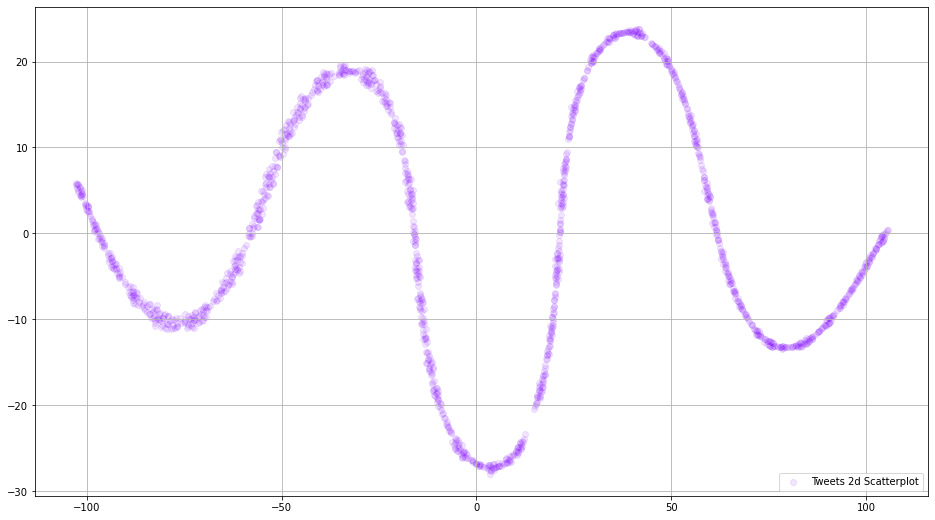

In [58]:
# Creating the tweets 2d scatterplot
prepare_for_w2v('file.txt', 'file1.txt', 'english')
model_ak = train_word2vec('file1.txt')

words_ak = []
embeddings_ak = []
for word in list(model_ak.wv.vocab):
    embeddings_ak.append(model_ak.wv[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Tweets 2d Scatterplot', embeddings_ak_2d, a=0.1)

## Part 3: Ranking

## 1. TF-IDF and OUR SCORE + cosine similarity ranking

### a. TF-IDF + cosine similarity

In [59]:
def create_index_tfidf(lines, num_documents):
    """
    Implement the inverted index and compute tf, df and idf
    
    Argument:
    lines -- collection of Wikipedia articles
    num_documents -- total number of documents
    
    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    index = defaultdict(list)
    tf = defaultdict(list)  #term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  #document frequencies of terms in the corpus
    idf = defaultdict(float)

    for i in range(len(lines)):  # Remember, lines contain all tweets
        page_id = json_data[str(i)]['id']
        terms = json_data[str(i)]['full_text']

        ## ===============================================================        
        ## create the index for the **current page** and store it in current_page_index
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is 
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0, 
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms):  ## terms contains page_title + page_text
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[page_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document. 
            # posting ==> [current_doc, [list of positions]] 
            # you can use it to infer the frequency of current term.
            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)

        #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1])/norm,4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term]+=1 # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_documents/ df[term])), 4)

    return index, tf, df, idf


In [60]:
start_time = time.time()
num_documents = len(all_tweets)
index, tf, df, idf = create_index_tfidf(all_tweets, num_documents)
print("Total time to create the index: {} seconds" .format(np.round(time.time() - start_time, 2)))

Total time to create the index: 72.41 seconds


In [61]:
def rank_documents(terms, docs, index, idf, tf):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """

    # We are interested only on the element of the docVector corresponding to the query terms 
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # We call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query. 
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    #HINT: use when computing tf for query_vector

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex]=query_terms_count[term]/query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26            
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]  # TODO: check if multiply for idf

    # Calculate the score of each doc 
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot
    
    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs

In [62]:
def search_tf_idf(query, index):
    """
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = cleanText(query)
    docs = set([posting[0] for posting in index[query[0]]])
    for term in query[1:]:
        try:
            # store in term_docs the ids of the docs that contain "term"                        
            term_docs=[posting[0] for posting in index[term]]
            
            # docs = docs Union term_docs
            docs = docs.intersection(set(term_docs))
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs = rank_documents(query, docs, index, idf, tf)
    return ranked_docs

In [63]:
#Output of ranked documents related to the query
print("Insert your query (i.e.: Computer Science):\n")
query = input()
ranked_docs = search_tf_idf(query, index)
if len(docs) < 10:
    top = len(docs)
else:
    top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
#for d_id in ranked_docs[:top]:
    #print("page_id= {} ".format(d_id))
formated = retrieve_docs(ranked_docs, top)

count = 1
for doc in formated:
    print('Result', count, ':\n\n', doc + '\n')
    count += 1

Insert your query (i.e.: Computer Science):

women in health work

Top 6 results out of 6 for the searched query:

Result 1 :

 @DrTedros @UNICEF @UN @WFP "I thank the women and men of WHO’s national and international staff who continue to work every day to protect and promote the health of all #Afghanistan’s people"-@DrTedros | World Health Organization (WHO) | Mon Sep 13 15:23:06 +0000 2021 | #Afghanistan | 93 | 25

Result 2 :

 Women make up 7⃣0⃣ % of the health workforce but only 2⃣5⃣ % at decision-making level. 

At the #GenerationEquality Forum this week, WHO joins global leaders and activists in advancing decent and safe work conditions for health and care workers everywhere.
https://t.co/52NIwTDRdK https://t.co/zk4Dw4JC9A | World Health Organization (WHO) | Thu Jul 01 08:52:13 +0000 2021 | #GenerationEquality | 210 | 78 | https://t.co/zk4Dw4JC9A

Result 3 :

 @DrTedros @WHOEMRO @WHOAfghanistan @UN_News_Centre @UNNewsArabic WHO particularly emphasizes the need for women to maint

### b. Your-Score + cosine similarity

In [64]:
def create_index_tfidf_our_score(lines, num_documents):
    """
    Implement the inverted index and compute tf, df and idf
    
    Argument:
    lines -- collection of Wikipedia articles
    num_documents -- total number of documents
    
    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    index = defaultdict(list)
    tf = defaultdict(list)  #term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  #document frequencies of terms in the corpus
    idf = defaultdict(float)

    for i in range(len(lines)):  # Remember, lines contain all tweets
        page_id = json_data[str(i)]['id']
        terms = json_data[str(i)]['full_text']

        ## ===============================================================        
        ## create the index for the **current page** and store it in current_page_index
        ## current_page_index ==> { ‘term1’: [current_doc, [list of positions]], ...,‘term_n’: [current_doc, [list of positions]]}

        ## Example: if the curr_doc has id 1 and his text is 
        ##"web retrieval information retrieval":

        ## current_page_index ==> { ‘web’: [1, [0]], ‘retrieval’: [1, [1,4]], ‘information’: [1, [2]]}

        ## the term ‘web’ appears in document 1 in positions 0, 
        ## the term ‘retrieval’ appears in document 1 in positions 1 and 4
        ## ===============================================================

        current_page_index = {}

        for position, term in enumerate(terms):  ## terms contains page_title + page_text
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_page_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_page_index[term]=[page_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_page_index.items():
            # posting will contain the list of positions for current term in current document. 
            # posting ==> [current_doc, [list of positions]] 
            # you can use it to infer the frequency of current term.
            norm += len(posting[1]) ** 2
        norm = math.sqrt(norm)

        #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_page_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1])/norm,4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term]+=1 # increment DF for current term

        #merge the current page index with the main index
        for term_page, posting_page in current_page_index.items():
            index[term_page].append(posting_page)

        # Compute IDF following the formula (3) above. HINT: use np.log
        for term in df:
            idf[term] = np.round(np.log(float(num_documents/ df[term])), 4)
            
        #Creating the our_score list which will contain the ids of the documents and their authoritative score.
        our_score = np.empty([len(json_data),2])
        for i in range(len(our_score)):
            our_score[i][0] = json_data[str(i)]['id']
            if(json_data[str(i)]['user']['followers_count'] == 0):
                our_score[i][1] = 0
            else:
                our_score[i][1] = json_data[str(i)]['favorite_count'] / np.log(json_data[str(i)]['user']['followers_count'])
                our_score[i][1] += json_data[str(i)]['retweet_count'] / np.log(json_data[str(i)]['user']['followers_count'])
            #if the tweet comes from a verified account
            if json_data[str(i)]['user']['verified']:
                our_score[i][1] += 0.05
            #if the user that retweet the tweet is following the account
            if json_data[str(i)]['user']['following']:
                our_score[i][1] += 0.05
            if json_data[str(i)]['favorited']:
                our_score[i][1] += 0.05
            if json_data[str(i)]['retweeted']:
                our_score[i][1] += 0.05
            #if the year is bigger or equal to five years from now
            if int(json_data[str(i)]['created_at'][-4:]) >= (datetime.now().year) -5 :
                our_score[i][1] += 0.05
        
        
    return index, tf, df, idf, our_score


In [65]:
from datetime import datetime

start_time = time.time()
num_documents = len(all_tweets)
index, tf, df, idf, our_score = create_index_tfidf_our_score(all_tweets, num_documents)
print("Total time to create the index: {} seconds" .format(np.round(time.time() - start_time, 2)))

Total time to create the index: 146.87 seconds


In [66]:
def rank_documents_our_score(terms, docs, index, idf, tf, our_score):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """

    # We are interested only on the element of the docVector corresponding to the query terms 
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # We call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query. 
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    #HINT: use when computing tf for query_vector

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        ## Compute tf*idf(normalize TF as done with documents)
        query_vector[termIndex]=query_terms_count[term]/query_norm * idf[term]

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26            
            if doc in docs:
                lst2 = [item[0] for item in our_score]
                index1 = lst2.index(doc)
                #We add the score from the our_score list
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term] + our_score[index1][1]  

    # Calculate the score of each doc 
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot
    
    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ title_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs

In [67]:
def search_tf_idf_our_score(query, index, our_score):
    """
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = cleanText(query)
    docs = set([posting[0] for posting in index[query[0]]])
    for term in query[1:]:
        try:
            # store in term_docs the ids of the docs that contain "term"                        
            term_docs=[posting[0] for posting in index[term]]
            
            # docs = docs Union term_docs
            docs = docs.intersection(set(term_docs))
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs = rank_documents_our_score(query, docs, index, idf, tf, our_score)
    return ranked_docs

In [68]:
#Output of ranked documents related to the query
print("Insert your query (i.e.: Computer Science):\n")
query = input()
ranked_docs = search_tf_idf_our_score(query, index, our_score)
if len(ranked_docs) < 10:
    top = len(ranked_docs)
else:
    top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
#for d_id in ranked_docs[:top]:
    #print("page_id= {} ".format(d_id))
formated = retrieve_docs(ranked_docs, top)

count = 1
for doc in formated:
    print('Result', count, ':\n\n', doc + '\n')
    count += 1

Insert your query (i.e.: Computer Science):

women in health work

Top 6 results out of 6 for the searched query:

Result 1 :

 Women make up 7⃣0⃣ % of the health workforce but only 2⃣5⃣ % at decision-making level. 

At the #GenerationEquality Forum this week, WHO joins global leaders and activists in advancing decent and safe work conditions for health and care workers everywhere.
https://t.co/52NIwTDRdK https://t.co/zk4Dw4JC9A | World Health Organization (WHO) | Thu Jul 01 08:52:13 +0000 2021 | #GenerationEquality | 210 | 78 | https://t.co/zk4Dw4JC9A

Result 2 :

 We must #ActForEqual to advance #GenderEquality in healthcare. Men continue to lead in global health while women continue to experience barriers like:

🔹 disproportionate burdens of unpaid care work, 
🔹 wage gaps
🔹 harassment 
🔹 less opportunities for career advancement. https://t.co/xPwj8VF50z | World Health Organization (WHO) | Thu Jul 01 06:43:11 +0000 2021 | #ActForEqual | #GenderEquality | 146 | 44 | https://t.co/xPwj8

## Evaluation of our score ranking function

In [69]:
#Creating the new ground truth
df_ground_truth1 = pd.DataFrame(columns=['q_id', 'doc_id', 'y_true'])

#Creating the list of queries ids
query1 = 'Vaccine for covid19'
query2 = 'Countries with more deaths from covid19'
query3 = 'Mental health support'
query4 = 'Women in health work'
query5 = 'Covid19 symptoms'
queries = [1,2,3,4,5]

#Creating the list of the top 10 ranked documents for each query
ranked_docs11 = search_tf_idf_our_score(query1, index, our_score)[:10]
ranked_docs22 = search_tf_idf_our_score(query2, index, our_score)[:10]
ranked_docs33 = search_tf_idf_our_score(query3, index, our_score)[:10]
ranked_docs44 = search_tf_idf_our_score(query4, index, our_score)[:10]
ranked_docs55 = search_tf_idf_our_score(query5, index, our_score)[:10]
ranked_docs_all1 = [ranked_docs11, ranked_docs22, ranked_docs33, ranked_docs44, ranked_docs55]

#Creating the list of labels indicating the relevance of documents (0 - not relevant, 4 - very relevant)
y_true1 = [0,0,3,4,1,2,1,1,3,0]
y_true2 = [1,0,0,0,3,2,0,0,0,3]
y_true3 = [2,0,3,1]
y_true4 = [4,4,1,3,3,2]
y_true5 = [1,0,2,4,0,2,0]
y_true_all = [y_true1, y_true2, y_true3, y_true4, y_true5]

#Creating the list of ranked documents ideally ordered by relevance
y_true1_ideal = y_true1.copy()
y_true2_ideal = y_true2.copy()
y_true3_ideal = y_true3.copy()
y_true4_ideal = y_true4.copy()
y_true5_ideal = y_true5.copy()

y_true1_ideal.sort(reverse=True)
y_true2_ideal.sort(reverse=True)
y_true3_ideal.sort(reverse=True)
y_true4_ideal.sort(reverse=True)
y_true5_ideal.sort(reverse=True)
y_true_ideal_all = [y_true1_ideal, y_true2_ideal, y_true3_ideal, y_true4_ideal, y_true5_ideal]


for i in range(len(queries)):
    for row in range(len(ranked_docs_all1[i])):
        newRow = {
            "q_id": queries[i],
            "doc_id": ranked_docs_all1[i][row] ,
            "y_true": y_true_all[i][row],
            "y_true_ideal": y_true_ideal_all[i][row]
        }
        
        df_ground_truth1 = df_ground_truth1.append(newRow, ignore_index=True, sort=False)

df_ground_truth1

,q_id,doc_id,y_true,y_true_ideal
0,1,1422632749282775050,0,4.0
1,1,1413230703605600259,0,3.0
2,1,1417050651419312128,3,3.0
3,1,1422909337480089601,4,2.0
4,1,1415394762954321922,1,1.0
5,1,1437474720736288771,2,1.0
6,1,1432284372690866186,1,1.0
7,1,1430162173037359116,1,0.0
8,1,1408532630698696704,3,0.0
9,1,1415512673928757255,0,0.0


In [70]:
#Adding a binary value indicating 1 - relevance, 0 - non-relevance
df_ground_truth1["bin_y_true"] = df_ground_truth1['y_true'].apply(lambda y: 1 if y >= 2 else 0)
df_ground_truth1.head()

,q_id,doc_id,y_true,y_true_ideal,bin_y_true
0,1,1422632749282775050,0,4.0,0
1,1,1413230703605600259,0,3.0,0
2,1,1417050651419312128,3,3.0,1
3,1,1422909337480089601,4,2.0,1
4,1,1415394762954321922,1,1.0,0


### Mean Average Precision (MAP)

In [71]:
#Computing mAP@10 for all queries of the dataset
map_k = map_at_k(df_ground_truth1, 10)
map_k

0.5753333333333333

### Mean Reciprocal Rank (MRR)

In [72]:
mrr = {}
for k in [3,5,10]:
    RRs = []
    for q in df_ground_truth1["q_id"].unique(): # loop over all query ids
        labels = np.array(df_ground_truth1[df_ground_truth1["q_id"] == q]["bin_y_true"]) # get labels for current query
        RRs.append(rr_at_k(labels, k)) # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)),4) # Mean RR at current k

In [73]:
mrr

{3: 0.5333, 5: 0.5733, 10: 0.5733}

### Average NDCG - Normalized Discounted Cumulative Gain

In [74]:
ndcgs = []
k=10
for q in df_ground_truth1["q_id"].unique(): # loop over all query ids
    labels = np.array(df_ground_truth1[df_ground_truth1["q_id"] == q]["y_true"]) ## get labels for current query
    scores = np.array(df_ground_truth1[df_ground_truth1["q_id"] == q]["y_true_ideal"]) # get ideal relevance order for current query
    ndcgs.append(np.round(ndcg_at_k(labels, scores, k), 4)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)),4) # Compute average NDCG
print("Average ndcg@{}: {}".format(k,avg_ndcg))

Average ndcg@10: 0.6636


## 2. Return a top-20 list of documents for each of the 5 queries, using word2vec + cosine similarity.

In [75]:
#We use the index creation function made before (Part 2)
start_time = time.time()
index = create_index(all_tweets)
print("Total time to create the index: {} seconds".format(np.round(time.time() - start_time, 2)))

Total time to create the index: 0.27 seconds


In [76]:
#This function transforms the words of a query or document in the averaged vector
def get_embedding_w2v(doc_tokens):
    embeddings = []
    for tok in doc_tokens:
        if tok in model_ak.wv.vocab:
            embeddings.append(model_ak.wv.word_vec(tok))
        else:
            embeddings.append(np.random.rand(200))
    # mean the vectors of individual words to get the vector of the document
    return np.mean(embeddings, axis=0)

In [77]:
#We create a list with documents ids and their averaged vectors
average_vector = []
for i in range(len(all_tweets)):
    lista = []
    ids = json_data[str(i)]['id']
    tweet = get_embedding_w2v(all_tweets[i])
    lista.extend([ids, tweet])
    average_vector.append(lista)

C:\Users\kiree\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\kiree\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [78]:
def rank_documents_w2v(terms, docs, index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    
    Returns:
    Print the list of ranked documents
    """

    # We are interested only on the element of the docVector corresponding to the query terms 
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # We call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary

    query_vector = np.asarray(get_embedding_w2v(terms))


    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query. 
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
 

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        # Generate doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26            
            if doc in docs:
                lst2 = [item[0] for item in average_vector]
                index1 = lst2.index(doc)
                doc_vectors[doc] = average_vector[index1][1]

    # Calculate the score of each doc 
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine similarity
    # see np.dot
    
    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]

    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_w2v(query, index)

    return result_docs

In [79]:
def search_w2v(query, index):
    """
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = cleanText(query)
    docs = set([posting[0] for posting in index[query[0]]])
    for term in query[1:]:
        try:
            # store in term_docs the ids of the docs that contain "term"                        
            term_docs=[posting[0] for posting in index[term]]
            
            # docs = docs Union term_docs
            docs = docs.intersection(set(term_docs))
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs = rank_documents_w2v(query, docs, index)
    return ranked_docs

In [80]:
#Query 1

query1 = 'Vaccine for covid19'
ranked_docs = search_w2v(query1, index)
if len(ranked_docs) < 20:
    top = len(ranked_docs)
else:
    top = 20

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
#for d_id in ranked_docs[:top]:
    #print("page_id= {} ".format(d_id))
formated = retrieve_docs(ranked_docs, top)

count = 1
for doc in formated:
    print('Result', count, ':\n\n', doc + '\n')
    count += 1


Top 20 results out of 290 for the searched query:

Result 1 :

 Getting vaccinated 💉 can help protect you and those around you from #COVID19 ⬇️ https://t.co/3GrojOAWT6 | World Health Organization (WHO) | Fri Aug 06 10:29:12 +0000 2021 | #COVID19 | 253 | 117 | https://t.co/3GrojOAWT6

Result 2 :

 Here is why you should get vaccinated even if you have had #COVID19 👇 | World Health Organization (WHO) | Fri Jun 25 13:27:47 +0000 2021 | #COVID19 | 432 | 221

Result 3 :

 RT @WHO: LIVE Q&amp;A on #COVID19 variants and vaccines with @doctorsoumya. #AskWHO https://t.co/RFfQvz1kmp | World Health Organization (WHO) | Sun Jun 27 20:15:54 +0000 2021 | #COVID19 | #AskWHO | 0 | 239

Result 4 :

 Getting vaccinated 💉 against #COVID19 helps protect you from getting sick. https://t.co/9Ad3uW0NsN | World Health Organization (WHO) | Wed Jul 21 15:14:10 +0000 2021 | #COVID19 | 366 | 155 | https://t.co/9Ad3uW0NsN

Result 5 :

 LIVE Q&amp;A on #COVID19 variants and vaccines with @doctorsoumya. #AskWHO htt

In [81]:
#Query 2

query2 = 'Countries with more deaths from covid19'
ranked_docs = search_w2v(query2, index)
if len(ranked_docs) < 20:
    top = len(ranked_docs)
else:
    top = 20

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
#for d_id in ranked_docs[:top]:
    #print("page_id= {} ".format(d_id))
formated = retrieve_docs(ranked_docs, top)

count = 1
for doc in formated:
    print('Result', count, ':\n\n', doc + '\n')
    count += 1


Top 12 results out of 12 for the searched query:

Result 1 :

 RT @DrTedros: Countries with high coverage are seeing a decoupling of #COVID19 cases &amp; deaths, whereas countries that can't access vaccines… | World Health Organization (WHO) | Sat Aug 14 11:41:44 +0000 2021 | #COVID19 | 0 | 182

Result 2 :

 Many countries around the 🌎🌍🌏 still face steep increases in #COVID19 cases &amp; deaths.

WHO continues to provide critical support from improving regional #COVID19 vaccine production to delivering medical supplies to the vulnerable.

👉https://t.co/9hp1lPg1ZY #WHOImpact https://t.co/Xp0ZAEjMbW | World Health Organization (WHO) | Sun Oct 03 19:48:00 +0000 2021 | #COVID19 | #COVID19 | #WHOImpact | 122 | 49 | https://t.co/Xp0ZAEjMbW

Result 3 :

 @DrTedros "As some countries ease public health and social measures, we are starting to see increases in #COVID19 transmission around the world. More cases means more hospitalizations, further stretching health workers and health systems, wh

In [82]:
#Query 3

query3 = 'Mental health support'
ranked_docs = search_w2v(query3, index)
if len(ranked_docs) < 20:
    top = len(ranked_docs)
else:
    top = 20

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
#for d_id in ranked_docs[:top]:
    #print("page_id= {} ".format(d_id))
formated = retrieve_docs(ranked_docs, top)

count = 1
for doc in formated:
    print('Result', count, ':\n\n', doc + '\n')
    count += 1


Top 4 results out of 4 for the searched query:

Result 1 :

 RT @WHOMalawi: Living with or caring for someone with a mental health condition can be difficult, but your support is valuable.
 
Here are… | World Health Organization (WHO) | Mon Oct 11 04:43:00 +0000 2021 | 0 | 38

Result 2 :

 To #BeatNCDs in SIDS, WHO calls for:
- an Action Centre to effectively address noncommunicable diseases &amp; mental health
-more resources to support health services
-integration of mental health considerations into health system strengthening https://t.co/ctYiSQo2Ez https://t.co/ZcgWs1oHNS | World Health Organization (WHO) | Mon Jun 28 14:08:28 +0000 2021 | #BeatNCDs | 119 | 34 | https://t.co/ZcgWs1oHNS

Result 3 :

 Jordan, 🇫🇯, lost his job during the #COVID19 pandemic. He is not the only one. But he was lucky to have found #mentalhealth support to get through this difficult time.
 
We need mental health care for everyone, everywhere!
#WorldMentalHealthDay https://t.co/1jOcBbSTwm | World Health O

In [83]:
#Query 4

query4 = 'Women in health work'
ranked_docs = search_w2v(query4, index)
if len(ranked_docs) < 20:
    top = len(ranked_docs)
else:
    top = 20

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
#for d_id in ranked_docs[:top]:
    #print("page_id= {} ".format(d_id))
formated = retrieve_docs(ranked_docs, top)

count = 1
for doc in formated:
    print('Result', count, ':\n\n', doc + '\n')
    count += 1


Top 6 results out of 6 for the searched query:

Result 1 :

 @DrTedros @UNICEF @UN @WFP "I thank the women and men of WHO’s national and international staff who continue to work every day to protect and promote the health of all #Afghanistan’s people"-@DrTedros | World Health Organization (WHO) | Mon Sep 13 15:23:06 +0000 2021 | #Afghanistan | 93 | 25

Result 2 :

 "The Gender Equality Forum presents us with the opportunity not just to acknowledge these challenges &amp; ambitions, but to take action. 
WHO is committed to advocating for decent &amp; safe work conditions for all health &amp; care workers, esp. women."-@DrTedros at #GenerationEquality | World Health Organization (WHO) | Thu Jul 01 14:35:42 +0000 2021 | #GenerationEquality | 91 | 26

Result 3 :

 Women make up 7⃣0⃣ % of the health workforce but only 2⃣5⃣ % at decision-making level. 

At the #GenerationEquality Forum this week, WHO joins global leaders and activists in advancing decent and safe work conditions for health a

In [84]:
#Query 5

query5 = 'Covid19 symptoms'
ranked_docs = search_w2v(query5, index)
if len(ranked_docs) < 20:
    top = len(ranked_docs)
else:
    top = 20

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs)))
#for d_id in ranked_docs[:top]:
    #print("page_id= {} ".format(d_id))
formated = retrieve_docs(ranked_docs, top)

count = 1
for doc in formated:
    print('Result', count, ':\n\n', doc + '\n')
    count += 1


Top 7 results out of 7 for the searched query:

Result 1 :

 Getting ill with #COVID19 after you are vaccinated is possible, but rare. Your symptoms are more likely to be mild.

Read more 👉https://t.co/y9lNOaCjgx https://t.co/EXquBtkg2v | World Health Organization (WHO) | Fri Aug 06 13:22:52 +0000 2021 | #COVID19 | 421 | 218 | https://t.co/EXquBtkg2v

Result 2 :

 If you are pregnant &amp; #COVID19 positive:
 
⏳ Seek medical care early
📞 Ask your health worker for advice on managing symptoms
🏥 Know where to go if your symptoms worsen
🗓️ Isolate yourself https://t.co/8Yq1BrmJ9l | World Health Organization (WHO) | Fri Sep 17 12:30:48 +0000 2021 | #COVID19 | 110 | 51 | https://t.co/8Yq1BrmJ9l

Result 3 :

 Most patients with #COVID19 will only get mild or moderate disease &amp; will not need supplemental oxygen.
It is important for them to be isolated from others, whether in a health facility or at home, but their symptoms can be managed with over-the-counter medicines like paracetamol h

## Evaluation of the word2vec ranking function

In [85]:
#Creating the new ground truth
df_ground_truth1 = pd.DataFrame(columns=['q_id', 'doc_id', 'y_true'])

#Creating the list of queries ids
query1 = 'Vaccine for covid19'
query2 = 'Countries with more deaths from covid19'
query3 = 'Mental health support'
query4 = 'Women in health work'
query5 = 'Covid19 symptoms'
queries = [1,2,3,4,5]

#Creating the list of the top 10 ranked documents for each query
ranked_docs111 = search_w2v(query1, index)[:10]
ranked_docs222 = search_w2v(query2, index)[:10]
ranked_docs333 = search_w2v(query3, index)[:10]
ranked_docs444 = search_w2v(query4, index)[:10]
ranked_docs555 = search_w2v(query5, index)[:10]
ranked_docs_all1 = [ranked_docs111, ranked_docs222, ranked_docs333, ranked_docs444, ranked_docs555]

#Creating the list of labels indicating the relevance of documents (0 - not relevant, 4 - very relevant)
y_true1 = [1,0,0,2,3,0,1,0,2,3]
y_true2 = [0,0,3,1,0,1,0,0,3,0]
y_true3 = [1,0,2,3]
y_true4 = [3,2,4,1,3,4]
y_true5 = [1,0,0,2,0,2,4]
y_true_all = [y_true1, y_true2, y_true3, y_true4, y_true5]

#Creating the list of ranked documents ideally ordered by relevance
y_true1_ideal = y_true1.copy()
y_true2_ideal = y_true2.copy()
y_true3_ideal = y_true3.copy()
y_true4_ideal = y_true4.copy()
y_true5_ideal = y_true5.copy()

y_true1_ideal.sort(reverse=True)
y_true2_ideal.sort(reverse=True)
y_true3_ideal.sort(reverse=True)
y_true4_ideal.sort(reverse=True)
y_true5_ideal.sort(reverse=True)
y_true_ideal_all = [y_true1_ideal, y_true2_ideal, y_true3_ideal, y_true4_ideal, y_true5_ideal]


for i in range(len(queries)):
    for row in range(len(ranked_docs_all1[i])):
        newRow = {
            "q_id": queries[i],
            "doc_id": ranked_docs_all1[i][row] ,
            "y_true": y_true_all[i][row],
            "y_true_ideal": y_true_ideal_all[i][row]
        }
        
        df_ground_truth1 = df_ground_truth1.append(newRow, ignore_index=True, sort=False)

df_ground_truth1

,q_id,doc_id,y_true,y_true_ideal
0,1,1423591981456838656,1,3.0
1,1,1408416636084707335,0,3.0
2,1,1409244114411982855,0,2.0
3,1,1417865492333621253,2,2.0
4,1,1408087054634799106,3,1.0
5,1,1435613167107952640,0,1.0
6,1,1437766148708343808,1,0.0
7,1,1438528587783495686,0,0.0
8,1,1423027293119729668,2,0.0
9,1,1410362947046682625,3,0.0


In [86]:
#Adding a binary value indicating 1 - relevance, 0 - non-relevance
df_ground_truth1["bin_y_true"] = df_ground_truth1['y_true'].apply(lambda y: 1 if y >= 2 else 0)
df_ground_truth1.head()

,q_id,doc_id,y_true,y_true_ideal,bin_y_true
0,1,1423591981456838656,1,3.0,0
1,1,1408416636084707335,0,3.0,0
2,1,1409244114411982855,0,2.0,0
3,1,1417865492333621253,2,2.0,1
4,1,1408087054634799106,3,1.0,1


### Mean Average Precision - MAP

In [87]:
#Computing mAP@10 for all queries of the dataset
map_k = map_at_k(df_ground_truth1, 10)
map_k

0.46084920634920634

### Mean Reciprocal Rank - MRR

In [88]:
mrr = {}
for k in [3,5,10]:
    RRs = []
    for q in df_ground_truth1["q_id"].unique(): # loop over all query ids
        labels = np.array(df_ground_truth1[df_ground_truth1["q_id"] == q]["bin_y_true"]) # get labels for current query
        RRs.append(rr_at_k(labels, k)) # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)),4) # Mean RR at current k

In [89]:
mrr

{3: 0.3333, 5: 0.4333, 10: 0.4333}

### Average NDCG - Normalized Discounted Cumulative Gain

In [90]:
ndcgs = []
k=10
for q in df_ground_truth1["q_id"].unique(): # loop over all query ids
    labels = np.array(df_ground_truth1[df_ground_truth1["q_id"] == q]["y_true"]) ## get labels for current query
    scores = np.array(df_ground_truth1[df_ground_truth1["q_id"] == q]["y_true_ideal"]) # get ideal relevance order for current query
    ndcgs.append(np.round(ndcg_at_k(labels, scores, k), 4)) # append NDCG for current query

avg_ndcg = np.round(float(sum(ndcgs)/len(ndcgs)),4) # Compute average NDCG
print("Average ndcg@{}: {}".format(k,avg_ndcg))

Average ndcg@10: 0.5734
